##Visualizing Mental health in the Tech Industry

In this dataset, we are working with multiple different categorical and numerical data. We will learn how to clean up the data so we can start using it for our analysis and visualization. This dataset is created from a 2014 survey that measures attiudes towards mental health and the frequency of occurence of mental health disorders in the tech industry.


Data retrieved from: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data


Let's start off by importing and reading our data.

In [2]:
import pandas as pd
import numpy as np

cols = []
df= pd.read_csv('survey.csv')

df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


Using info() function to check for null values in our columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

We can also use isnull() and sum() function to quickly check the number of null values in our columns.

In [ ]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

From a quick glance, we can conclude that we have 3 columns with null values that will need preprocessing. (The comment columns is an optional section for the surveyor to fill up, so it make sense that it contains many null values)

Furthermore, there are some columns that we will not be using, let us drop those columns

In [ ]:
df = df.drop(columns=['state', 'comments', 'Timestamp'])

##Quick Visualizations

Next, lets start on some visualization. Some of these columns/data can be quickly visualize to get us a general idea of what kind of data we are working with, and how we can use these data to do our analysis.

However, we will see later that not all data can be used easily without any preprocessing of the data.

Let us take a look at the different country present in our data. We will be using matplotlib to plot our visualization. We can use value_counts() and plot.pie() to count the numbers of subjects in each country and also their distribution.

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

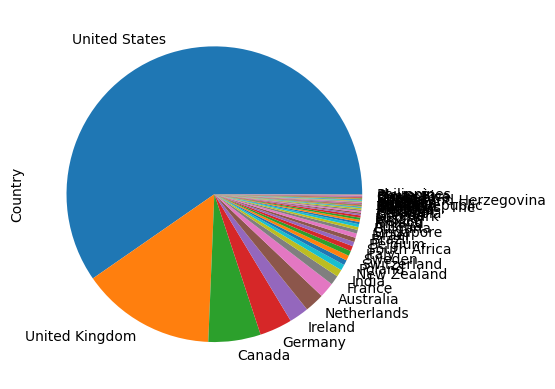

In [ ]:
import matplotlib.pyplot as plt
country_counts = df['Country'].value_counts()
country_counts.plot.pie()
country_counts

From this visualization, we can conclude that the majority of our data is from the US.


**Challenge**: Create a visualization to view how many people are working remotely.

No     883
Yes    376
Name: remote_work, dtype: int64

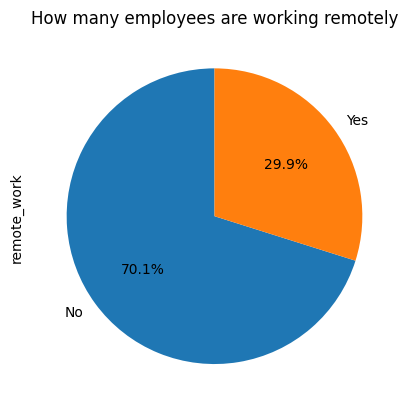

In [ ]:
remote_count = df['remote_work'].value_counts()
plt.title("How many employees are working remotely")
remote_count.plot.pie(autopct='%1.1f%%', startangle=90) # we can also show percentages in our plot
remote_count


These data are easy to work with as they contain consistent values and without any null values included.

##Preprocessing data

Next, we will look at some more scrambled and messy data. How can we deal with these type of data and make it workable for visualization and analysis. As this dataset is composed from a survey without using multiple choice answers, subjects are able to write their own answers however they want. For future reference, surveys with limited answers should be taken with multiple choice, this will make the data more readable and easy to use.

###Gender column

We can see that our gender column are made up of multiple different answers which will make it difficult for us to group them the answers together. Therefore, we need to categorize them manually in three categories. We will have male, female and other.

First, we will find out all the different values that is present in the columns. We will then create a mapping and sort all the different values into their own category. We will create a dictionary for our categories, we will call it our gender mapping.

In [7]:

# Define gender categories
gender_mapping = {
    "male": ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"],
    "female": ["cis female", "f", "female", "woman", "femake", "female ", "cis-female/femme", "female (cis)", "femail"],
    "other": ["trans-female", "something kinda male?", "queer/she/they", "non-binary", "nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
}


Next, we can create a function to change all our values to lower case and also apply our new categories back to our columns.

In [8]:

# Function to map gender
def map_gender(gender):
    for category, values in gender_mapping.items():
        if str.lower(gender) in values: #convert all characters to lowercase
            return category
    return gender  # Return the original value if not matched

# Apply the mapping function to the 'Gender' column
df['Gender'] = df['Gender'].apply(map_gender)

# Remove "A little about you" and "p" entries as it makes no sense
df = df[~df['Gender'].isin(['A little about you', 'p'])]

# Print unique values
print(df['Gender'].unique())


['female' 'male' 'other']


We now have all our gender seperated into three categories; female, male and other.

Finally, we can take a look at the distribution of genders in our dataset.

male      991
female    247
other      19
Name: Gender, dtype: int64

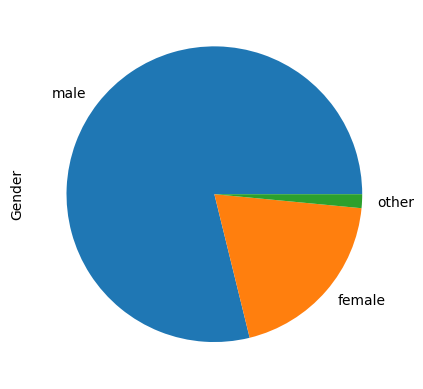

In [9]:
gender_count = df['Gender'].value_counts()
gender_count.plot.pie()
gender_count

From the visualization, the male has a way larger distribution in our dataset.

###Age column

Furthermore, the age column need some sorting as well. Just like the gender column, the age column had numbers that was not realistic. Let use unique() function to see all our ages.

In [ ]:
unique_age_values = df['Age'].unique()
print(unique_age_values)

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


As you can see some of these answers are random and definitely not someones age. In additon, this is a survey for people in tech, ages like 8 and 11 are too young to be working. We need to sort these numbers!

We can create a range for our age that seems reasonable for our data, and remove all other ages outside of this range.

In [ ]:
df = df[(df['Age'] >= 19) & (df['Age'] <= 100)]

# Get unique values in the filtered "Age" column
unique_age_values = df['Age'].unique()

# Print the unique age values
print(unique_age_values)

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 28 26 22 19
 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


After only including ages from 19 and above to 100 and below. We can plot and see our age distribution in our dataset.

array([<Axes: ylabel='Frequency'>], dtype=object)

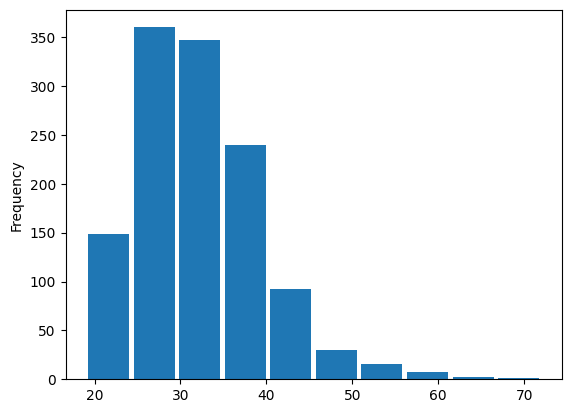

In [ ]:
df['Age'].plot.hist(subplots=True, rwidth=0.9)

We can see that the most frequent age present in our data is around late 20s and early 30s.

###Using impute to preserve data

Sometimes for our numerical values, it is easy for us to just remove the rows with the null values or values that we don't want, however, this means that we could be losing important on data. There is a method called impute, where we replace the values using our median.

First, lets use .mean() to find what our age median is.

In [3]:
df= pd.read_csv('survey.csv') # We can read our dataset again to have our original Age column

Age = df['Age']
np.mean(Age)


79428148.31135821

Oh that doesn't seem right. Because our average includes all the values in our column, it is including the values the really big unreasonable numbers. We need to just find the mean for values in a range.

In [4]:
Age = df['Age']

upper_limit = 100
lower_limit = 18

mean = np.mean(Age[(Age > lower_limit) & (Age < upper_limit)])
mean = round(mean, 0) #rounding our decimals
mean

32.0

This is a good average representation of our age. Let use age 32 as our median.

Now we can replace those ages that are lower than 18 and higher than 100 to our mean value of age 32.

In [5]:
# Replace elements below the lower_limit with the calculated mean
df.loc[df['Age'] < lower_limit, 'Age'] = mean
# Replace elements above the upper_limit with the calculated mean
df.loc[df['Age'] > upper_limit, 'Age'] = mean

unique_age_values = df['Age'].unique()
# Print the unique age values
print(unique_age_values)

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


We can see that all our age values are only from 18 to 100, there are not outliers and random ages. With this, we can proceed to use our age column.

##Comparing different data points

Now that our gender columns and age columns have been processed and ready to use. We can take a look if there are any correlation between our data points.
We can first look at our dataset between gender and age.

We can use seaborn, a popular data visualization library, to plot our data points.

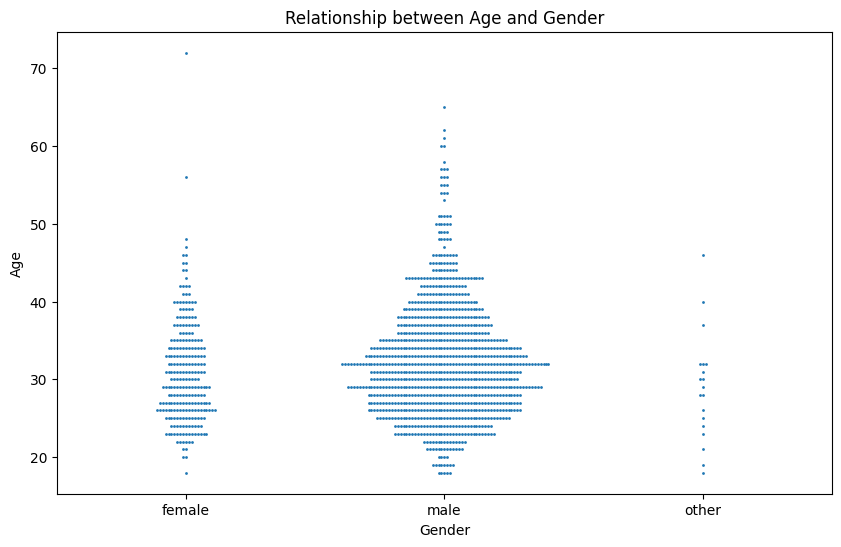

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Gender', y='Age', size=2) #size changes the sizes of our data points, the smaller the size, the more points it can show
plt.title('Relationship between Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

Nice! This gives us a clear view on the distribution of genders and the groups of ages in our dataset. We can conclude that our dataset consist mostly of male in their late 20s to their early 30s.

**Challenge**: Can you create a plot using seaborn to show correlation between two columns.

**Answer**: You can try showing the relationship between the subjects that got treatment and their ages.

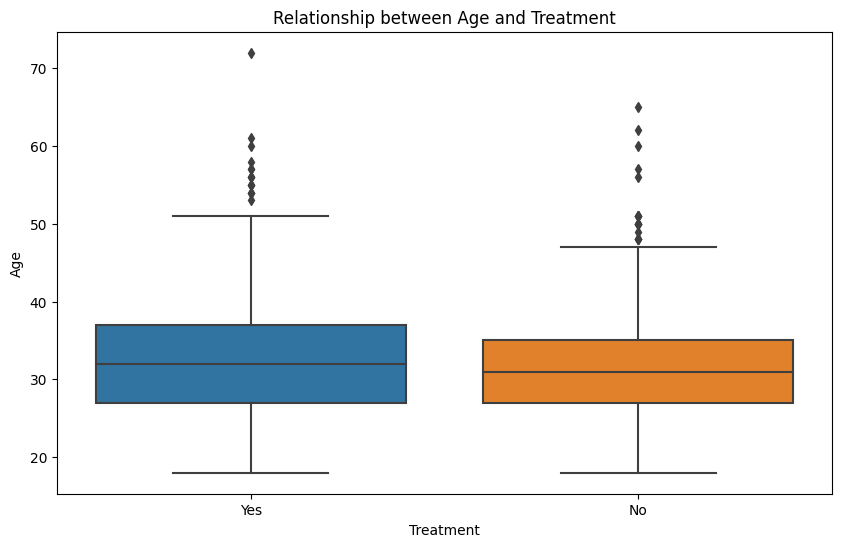

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='treatment', y='Age')
plt.title('Relationship between Age and Treatment')
plt.xlabel('Treatment')
plt.ylabel('Age')

plt.show()

From this visualization, we can conclude that people who are more likely to not get treatment are closer to the ages of late 20s and early 30s.

**Challenge**: There are many columns in our dataset that can prove to be useful. Use seaborn to create a plot from a data we have yet to analyze and explain your finding.

**Answer**:

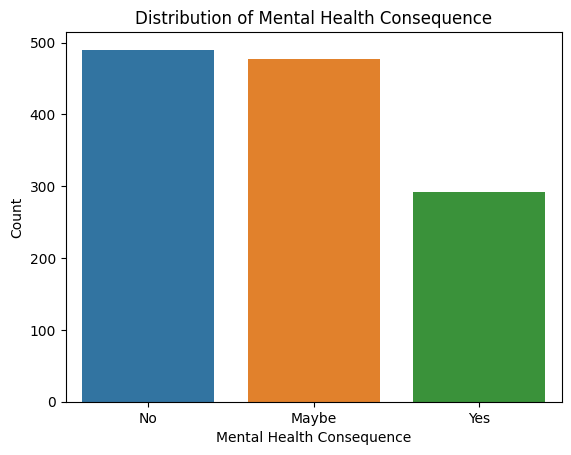

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='mental_health_consequence')# We can use seaborn to plot categorical data easier
plt.title('Distribution of Mental Health Consequence')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Count')

plt.show()